In [146]:
#import rich.pretty
#import commons
from db_actions import db_actions
import pandas as pds
import numpy as np

In [147]:
csvPath = "predBase.csv"
if csvPath != "":
    dF = None
    try:
        dF = pds.read_csv(open(csvPath, "r"))  # already filtered for realtime > 1000)
    except:
        pass
    try:
        dF = pds.read_csv(open(csvPath + ".csv", "r"))
    except:
        pass
    if dF is None:
        raise Exception(f"Couldn't open csv file {csvPath!r} or {(csvPath + '.csv')!r}")
else:
    with db_actions.connect() as conn:
        dF = pds.read_sql('SELECT * FROM "averageRuntimesPredictionBase1000"', conn)
# print(dF)
x_cols = [
    "build-linux-kernel1",
    "fio2",
    "fio3",
    "fio4",
    "fio5",
    "fio6",
    "fio7",
    "fio8",
    "fio9",
    "iperf10",
    "iperf11",
    #"iperf12",
    "iperf13",
    "john-the-ripper14",
    "john-the-ripper15",
    "ramspeed16",
    "ramspeed17",
    "ramspeed18",
    "ramspeed19",
    "ramspeed20",
    "ramspeed21",
    "ramspeed22",
    "ramspeed23",
    "ramspeed24",
    "ramspeed25",
    "stream26",
    "stream27",
    "stream28",
    "stream29",
    "pCpu",
    "cpus",
    "rss",
    "vmem",
    "rchar",
    "wchar",
    "syscr",
    "syscw",
]
y_cols = "rank"
X = dF[x_cols]
y = dF[y_cols]

In [148]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [149]:
X

,build-linux-kernel1,fio2,fio3,fio4,fio5,fio6,fio7,fio8,fio9,iperf10,...,stream28,stream29,pCpu,cpus,rss,vmem,rchar,wchar,syscr,syscw
0,4,4,1,6,1,2,2,2,2,13,...,6,6,169.398332,2,3.227893e+08,8.896484e+09,3.604557e+07,7.123642e+05,18072.933333,236.583333
1,13,4,1,21,1,2,2,2,2,2,...,7,7,172.296666,2,2.798736e+08,8.904040e+09,3.604494e+07,7.123477e+05,18072.600000,236.583333
2,3,25,1,4,1,2,2,2,2,4,...,8,8,173.391668,2,3.001020e+08,8.920521e+09,3.604553e+07,7.123549e+05,18072.883333,236.583333
3,21,4,1,6,1,2,2,2,2,12,...,23,23,169.503334,2,3.697622e+08,8.937702e+09,3.604470e+07,7.123499e+05,18072.466667,236.583333
4,1,18,1,21,1,2,2,2,2,14,...,4,4,166.208333,2,3.283890e+08,8.905091e+09,3.604556e+07,7.123542e+05,18072.916667,236.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,25,25,1,27,1,2,2,2,2,20,...,21,21,168.706669,2,2.299183e+08,2.872655e+09,2.510351e+08,2.024109e+08,58832.866667,34999.633333
2129,20,18,1,21,1,2,2,2,2,17,...,20,20,164.616667,2,2.284317e+08,3.141343e+09,2.510357e+08,2.024109e+08,56013.366667,34998.366667
2130,18,11,1,6,1,2,2,2,2,22,...,18,17,163.870000,2,2.166854e+08,3.140811e+09,2.510351e+08,2.024109e+08,56402.566667,34997.900000
2131,10,11,1,6,1,2,2,2,2,27,...,16,16,165.026665,2,2.096554e+08,3.141013e+09,2.510350e+08,2.024131e+08,56188.133333,34993.200000


In [150]:
g = GenericUnivariateSelect(f_regression, mode='k_best', param=5)
X_poly = PolynomialFeatures(3, interaction_only=True).fit_transform(X)
X_new = g.fit_transform(X, y)
filtered_X_cols = np.array(x_cols)[g.get_support(indices=True)]
", ".join(map(lambda x: repr(x), filtered_X_cols))

"'john-the-ripper15', 'ramspeed22', 'ramspeed23', 'ramspeed24', 'ramspeed25'"

In [151]:
#filtered_X_cols

In [152]:
import seaborn as sbs

top1 = sorted(np.array(g.scores_)[g.get_support(indices=True)])
top1

[566.3675649734762,
 580.071010082908,
 601.1236272334836,
 605.0832409945057,
 1021.1695521511352]

In [153]:
len(np.array(g.scores_)[g.get_support(indices=True)])

5

<AxesSubplot:>

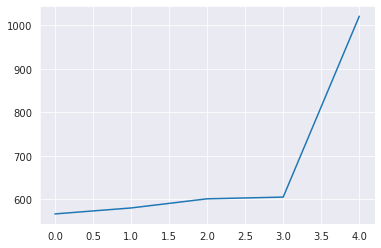

In [154]:
sbs.lineplot(data=sorted(np.array(g.scores_)[g.get_support(indices=True)]))

In [155]:
csvPath = "predBase.csv"
if csvPath != "":
    dF = None
    try:
        dF = pds.read_csv(open(csvPath, "r"))  # already filtered for realtime > 1000)
    except:
        pass
    try:
        dF = pds.read_csv(open(csvPath + ".csv", "r"))
    except:
        pass
    if dF is None:
        raise Exception(f"Couldn't open csv file {csvPath!r} or {(csvPath + '.csv')!r}")
else:
    with db_actions.connect() as conn:
        dF = pds.read_sql('SELECT * FROM "averageRuntimesPredictionBase1000"', conn)
# print(dF)
x_cols = [
    'john-the-ripper15', 'ramspeed16', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed22',
    'ramspeed23', 'ramspeed24', 'ramspeed25'
    # 'fio3', 'fio5', 'john-the-ripper15', 'ramspeed16', 'ramspeed17', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed22', 'ramspeed23', 'ramspeed24', 'ramspeed25'
    # 'build-linux-kernel1', 'fio3', 'fio5', 'fio6', 'fio7', 'fio8', 'fio9', 'john-the-ripper15', 'ramspeed16', 'ramspeed17', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed22', 'ramspeed23', 'ramspeed24', 'ramspeed25', 'stream27'
]
y_cols = "rank"
X = dF[x_cols]
y = dF[y_cols]

In [156]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [157]:
X

,john-the-ripper15,ramspeed16,ramspeed18,ramspeed19,ramspeed20,ramspeed21,ramspeed22,ramspeed23,ramspeed24,ramspeed25
0,3,12,12,13,13,14,12,13,11,12
1,16,2,2,2,2,1,2,1,2,2
2,8,1,1,1,1,2,1,2,1,1
3,15,22,22,21,21,21,21,20,22,21
4,1,9,9,10,9,9,8,11,7,9
...,...,...,...,...,...,...,...,...,...,...
2128,26,20,20,20,20,19,20,21,20,19
2129,23,21,21,22,22,22,22,23,21,22
2130,24,14,15,15,15,15,14,16,15,16
2131,18,15,16,16,16,16,15,15,16,17


In [158]:
g = GenericUnivariateSelect(f_regression, mode='k_best', param=15)
X_poly = PolynomialFeatures(3, interaction_only=True).fit_transform(X)
X_new = g.fit_transform(X_poly, y)
#filtered_X_cols = np.array(x_cols)[g.get_support(indices=True)]
#", ".join(map(lambda x: repr(x), filtered_X_cols))

/home/alex/anaconda3/envs/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/alex/anaconda3/envs/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [159]:
#filtered_X_cols

In [160]:
import seaborn as sbs

top2 = sorted(np.array(g.scores_)[g.get_support(indices=True)])
top2

[656.0245978507477,
 658.2317274806264,
 663.6896663429989,
 667.9922300965396,
 669.7489681454629,
 841.9382416527793,
 869.80880998922,
 892.1068335904318,
 895.8952341266631,
 901.6764759125199,
 912.9808719335363,
 914.0295957010733,
 917.1645814984736,
 970.5810773101731,
 1021.1695521511341]

In [161]:
len(np.array(g.scores_)[g.get_support(indices=True)])

15

<AxesSubplot:>

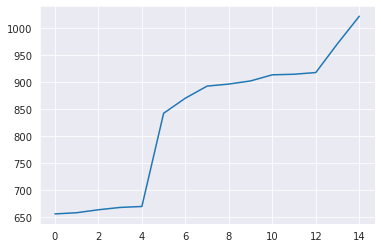

In [162]:
sbs.lineplot(data=sorted(np.array(g.scores_)[g.get_support(indices=True)]))

In [163]:
np.array(top1) - np.array(top2)

ValueError: operands could not be broadcast together with shapes (5,) (15,) 